In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

### Simple Polynomial Regression

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
#np.random.randn(200, 1) adding random noise to the data

#This is the original equation of our data
# y = 0.8x^2 + 0.9x + 2

In [4]:
X

array([[-1.42071364],
       [-2.26688492],
       [-0.41985165],
       [-1.96304625],
       [ 0.7899283 ],
       [-0.92534136],
       [ 2.99512236],
       [-1.44985481],
       [-1.99719999],
       [ 2.29835995],
       [ 1.77936698],
       [-2.33714528],
       [ 0.15033752],
       [-0.66553997],
       [ 1.71942514],
       [-0.80358775],
       [-2.45556109],
       [-2.69405995],
       [ 2.5217224 ],
       [-2.86589225],
       [ 1.41368923],
       [-0.00735957],
       [-2.14684658],
       [ 0.13742142],
       [ 0.82531964],
       [ 1.07012206],
       [ 0.17981998],
       [ 0.59930839],
       [ 2.49367664],
       [ 2.79178649],
       [ 0.23673985],
       [ 1.71234014],
       [-2.09513792],
       [ 2.10025101],
       [-2.11444306],
       [ 0.28548582],
       [-1.03554279],
       [ 0.24833732],
       [ 2.97103434],
       [ 1.22827386],
       [ 2.90991286],
       [-1.70307153],
       [ 0.54797594],
       [ 2.7348781 ],
       [-1.90172568],
       [-1

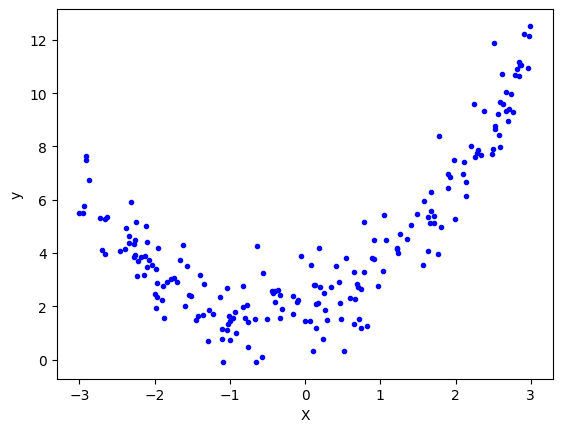

In [5]:
# b. means blue color and . as marker
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

-0.007016211544407902

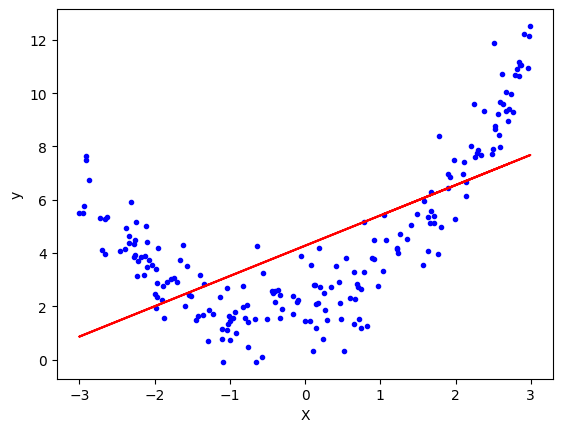

In [10]:
# b. means blue color and . as marker
plt.plot(X, y,'b.')
plt.plot(X_train, lr.predict(X_train),color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### r2 score in Linear reg is not good so we will apply polynomial linear regression

In [11]:
#if include bias is set to False the we will only get x^1 and x^2 cols we will not get x^0 (here for degree = 2)
poly = PolynomialFeatures(degree=2,include_bias=True)

In [12]:
X_train_trf = poly.fit_transform(X_train)
X_test_trf = poly.transform(X_test)

In [13]:
print(X_train[0])
print(X_train_trf[0])

[2.70643971]
[1.         2.70643971 7.32481592]


In [14]:
lr = LinearRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
r2_score(y_test,y_pred)

0.9070655203575726

In [15]:
# y = 0.8x^2 + 0.9x + 2
#from eqn coeff = [0,0.9,0.8]
#and intercept = 2
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88270419 0.77838004]]
[1.93414069]


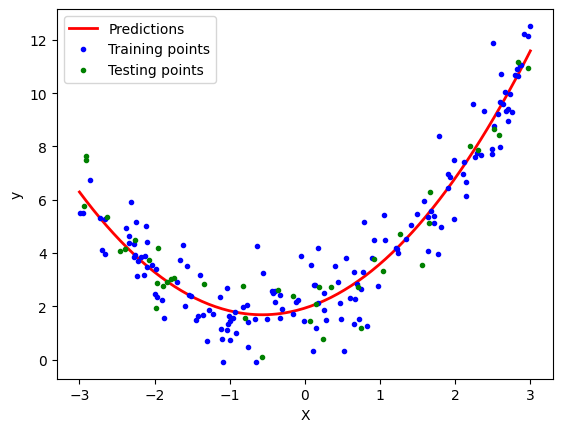

In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

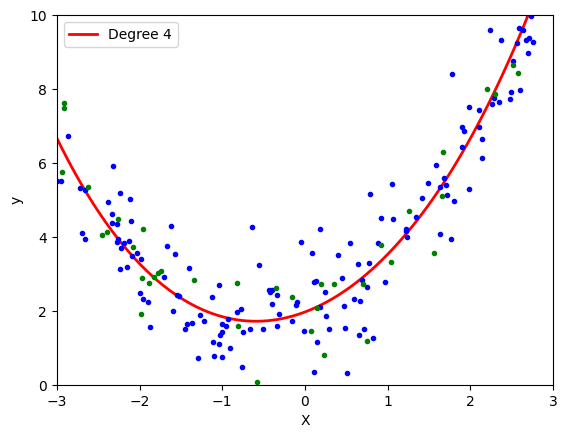

In [18]:
polynomial_regression(4)

### Multiple Polynomial Regression

In [19]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [20]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [21]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [22]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [23]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [24]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

In [25]:
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 10
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [26]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [27]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

In [28]:
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 10
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [29]:
X_multi_trans.shape

(100, 10)

In [30]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:

X_test_multi = poly.transform(final)

In [32]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [33]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()